Código Mersenne Twister

Clientes que llegaron en 24h: 292
Primeros 10 tiempos de llegada (h): [0.02 0.07 0.46 0.49 0.54 0.65 0.77 0.79 0.94 1.07]


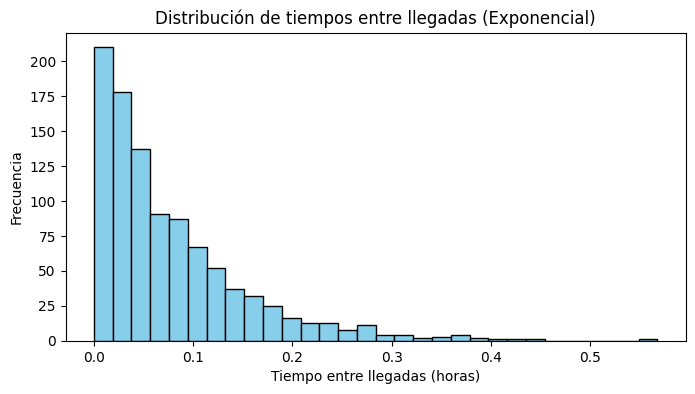

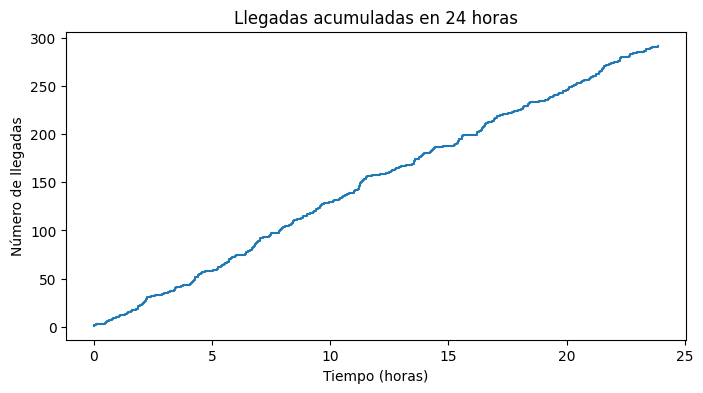

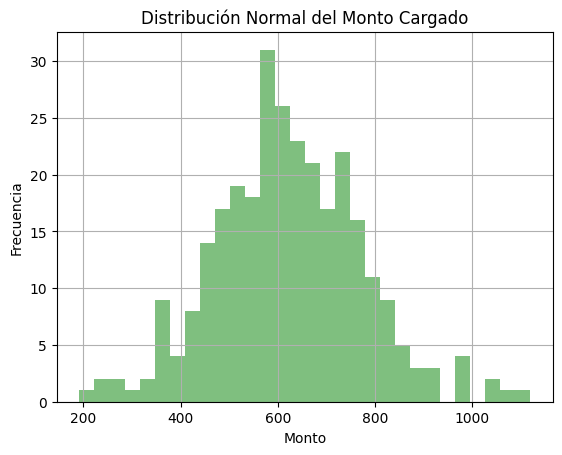

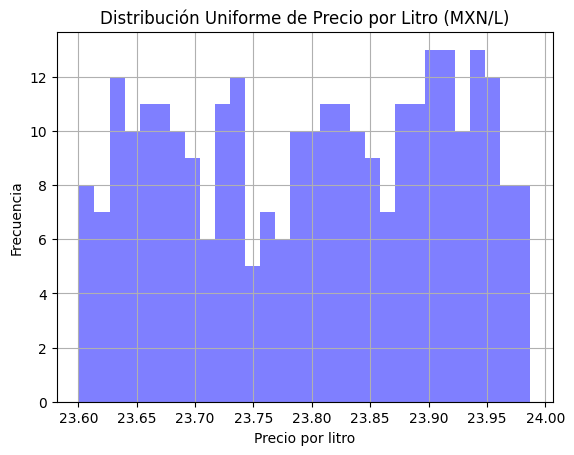

Máximo: 27.57 minutos
Mínimo: 0.01 minutos


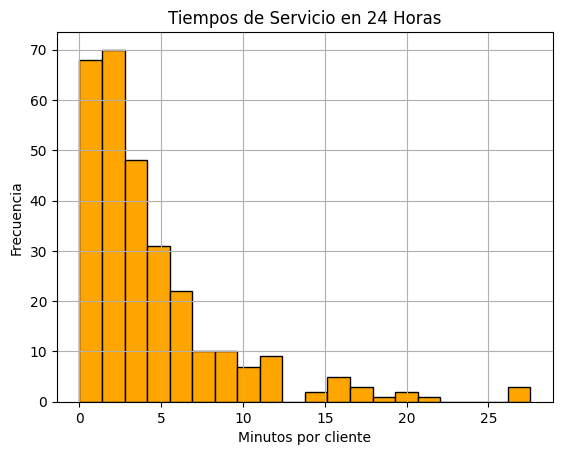

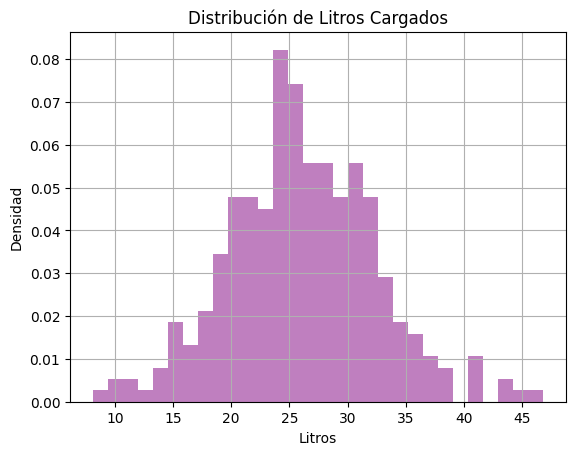

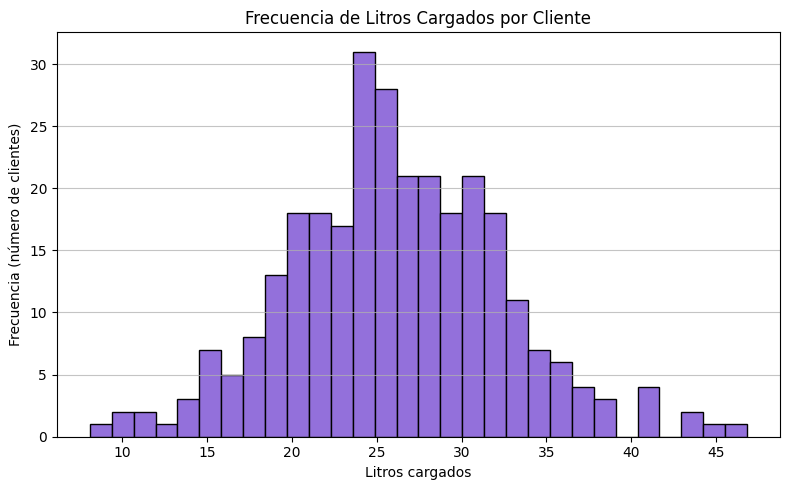

-----------Medias------:
Tiempos entre llegadas: 0.08 horas
Monto: 622.51
Precio: 23.80
Tiempo de servicio: 4.44 minutos

-------Desviaciones Estándar:--------
Tiempos entre llegadas: 0.08 horas
Monto: 151.32
Precio: 0.11
Tiempo de servicio: 4.67 minutos

--------Percentiles (25th, 50th, 75th)--------:
Tiempos entre llegadas: [0.02326702 0.05378521 0.10759949]
Monto: [521.15879657 615.93490906 721.73390808]
Precio: [23.6989418  23.80816285 23.90115601]
Tiempo de servicio: [1.45321809 2.91627429 5.68768785]


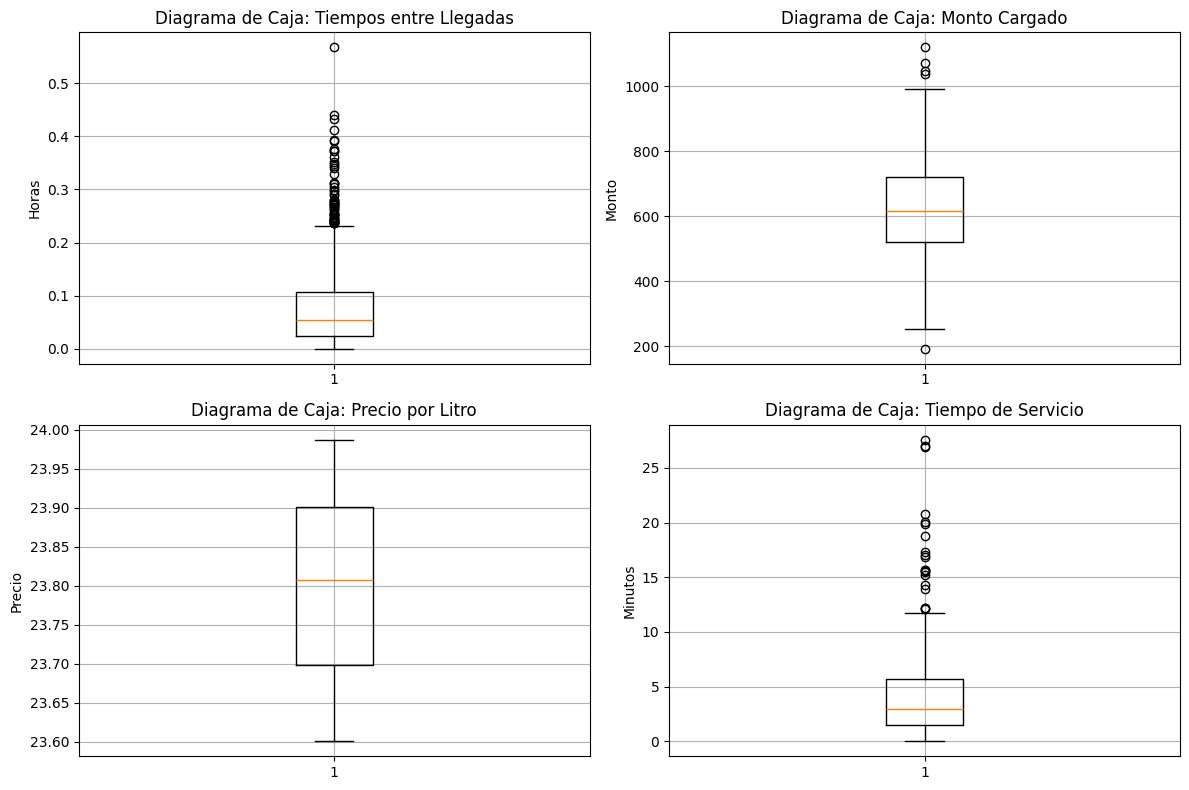

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#----Tiempo entre llegadas----

#Parámetros
lambda_rate = 12  # tasa promedio de llegadas por hora (puedes cambiarla)
total_time = 24   # horas totales a simular

#Simulación
#np.random.seed(0)  # para reproducibilidad

rng = np.random.default_rng(12345)  # Generador de números aleatorios con semilla fija

# Generar tiempos entre llegadas (en horas)
tiempos_entre_llegadas = rng.exponential(1/lambda_rate, 1000)

# Calcular los tiempos acumulados de llegada
tiempos_llegada = np.cumsum(tiempos_entre_llegadas)
# Mantener solo los que ocurren dentro de las 24 horas
tiempos_llegada = tiempos_llegada[tiempos_llegada <= total_time]

#Resultados
print(f"Clientes que llegaron en 24h: {len(tiempos_llegada)}")
print("Primeros 10 tiempos de llegada (h):", np.round(tiempos_llegada[:10], 2))

#Gráficas
plt.figure(figsize=(8,4))
plt.hist(tiempos_entre_llegadas, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de tiempos entre llegadas (Exponencial)")
plt.xlabel("Tiempo entre llegadas (horas)")
plt.ylabel("Frecuencia")
#plt.show()

plt.figure(figsize=(8,4))
plt.step(tiempos_llegada, range(1, len(tiempos_llegada)+1))
plt.title("Llegadas acumuladas en 24 horas")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Número de llegadas")
plt.show()

#----Monto cargado----
media=600
desv=150

n=tiempos_llegada.shape[0] #cambiar con lo que de IVAN
monto=rng.normal(media,desv,n)
#print(monto)

# Graficar la distribución
plt.hist(monto, bins=30, alpha=0.5, color='g')
plt.title('Distribución Normal del Monto Cargado')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

#----Precio por litro----
#Distribucion Uniforme
a = 23.60
b = 23.99
n=tiempos_llegada.shape[0] #este variara dependiendo del tiempo de llegadas por IVAN
precio = rng.uniform(a, b, n)
#print(precio)
# Graficar la distribucion
plt.hist(precio, bins=30, alpha=0.5, color='b')  # quitar density=True
plt.title('Distribución Uniforme de Precio por Litro (MXN/L)')
plt.xlabel('Precio por litro')
plt.ylabel('Frecuencia')  # ahora es número de observaciones
plt.grid()
plt.show()


#----Tiempo de servicio----
# Parámetros
#Tiempo esperado 240=1/lambda_servicio
tiempoesperado = 4  # en minutos
lambda_servicio = 1/tiempoesperado  # esto puede cambiar
n_clientes = tiempos_llegada.shape[0]  # esto puede cambiar en 24 horas

# Simulación de tiempos de servicio
tiempos_servicio = rng.exponential(scale=1/lambda_servicio, size=n_clientes)

# Estadísticas
#print(f"Promedio de servicio: {np.mean(tiempos_servicio):.2f} minutos")
print(f"Máximo: {np.max(tiempos_servicio):.2f} minutos")
print(f"Mínimo: {np.min(tiempos_servicio):.2f} minutos")

# Gráfico
plt.hist(tiempos_servicio, bins=20, color='orange', edgecolor='black')
plt.title("Tiempos de Servicio en 24 Horas")
plt.xlabel("Minutos por cliente")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

#Litros cargados
litros_cargados=monto/precio
plt.hist(litros_cargados, density=True, bins=30, alpha=0.5, color='purple')
plt.title('Distribución de Litros Cargados')
plt.xlabel('Litros')
plt.ylabel('Densidad')
plt.grid()
plt.show()

#----Frecuencia vs Litros cargados----
plt.figure(figsize=(8,5))
plt.hist(litros_cargados, bins=30, color='mediumpurple', edgecolor='black', density=False)
plt.title('Frecuencia de Litros Cargados por Cliente')
plt.xlabel('Litros cargados')
plt.ylabel('Frecuencia (número de clientes)')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


#----Estadisticas descriptivas de todas las variables----
#Medias
media_tiempos_entre_llegadas=np.mean(tiempos_entre_llegadas)
media_monto=np.mean(monto)
media_precio=np.mean(precio)
media_tiempo_servicio=np.mean(tiempos_servicio)
#Desviaciones estandar
desv_tiempos_entre_llegadas=np.std(tiempos_entre_llegadas)
desv_monto=np.std(monto)
desv_precio=np.std(precio)
desv_tiempo_servicio=np.std(tiempos_servicio)
#percentiles
percentiles_tiempos_entre_llegadas=np.percentile(tiempos_entre_llegadas, [25, 50, 75])
percentiles_monto=np.percentile(monto, [25, 50, 75])
percentiles_precio=np.percentile(precio, [25, 50, 75])
percentiles_tiempo_servicio=np.percentile(tiempos_servicio, [25, 50, 75])

print("-----------Medias------:")
print(f"Tiempos entre llegadas: {media_tiempos_entre_llegadas:.2f} horas")
print(f"Monto: {media_monto:.2f}")
print(f"Precio: {media_precio:.2f}")
print(f"Tiempo de servicio: {media_tiempo_servicio:.2f} minutos")
print("\n-------Desviaciones Estándar:--------")
print(f"Tiempos entre llegadas: {desv_tiempos_entre_llegadas:.2f} horas")
print(f"Monto: {desv_monto:.2f}")
print(f"Precio: {desv_precio:.2f}")
print(f"Tiempo de servicio: {desv_tiempo_servicio:.2f} minutos")
print("\n--------Percentiles (25th, 50th, 75th)--------:")
print(f"Tiempos entre llegadas: {percentiles_tiempos_entre_llegadas}")
print(f"Monto: {percentiles_monto}")
print(f"Precio: {percentiles_precio}")
print(f"Tiempo de servicio: {percentiles_tiempo_servicio}")

#----Graficas diagramas de caja----
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.boxplot(tiempos_entre_llegadas, vert=True)
plt.title("Diagrama de Caja: Tiempos entre Llegadas")
plt.ylabel("Horas")
plt.grid(True)
plt.subplot(2, 2, 2)
plt.boxplot(monto, vert=True)
plt.title("Diagrama de Caja: Monto Cargado")
plt.ylabel("Monto")
plt.grid(True)
plt.subplot(2, 2, 3)
plt.boxplot(precio, vert=True)
plt.title("Diagrama de Caja: Precio por Litro")
plt.ylabel("Precio")
plt.grid(True)
plt.subplot(2, 2, 4)
plt.boxplot(tiempos_servicio, vert=True)
plt.title("Diagrama de Caja: Tiempo de Servicio")
plt.ylabel("Minutos")
plt.grid(True)
plt.tight_layout()
plt.show()

Código LCG


--- NUMPY ---
Clientes en 24 h: 258

[Inter-llegadas (h) [NumPy]] n=258
  media=0.0930  |  std=0.0895
  P25=0.0296  |  P50=0.0648  |  P75=0.1369

[Monto MXN [NumPy]] n=258
  media=596.2280  |  std=158.7770
  P25=494.0964  |  P50=596.5238  |  P75=708.3436

[Precio MXN/L [NumPy]] n=258
  media=23.8044  |  std=0.1087
  P25=23.7165  |  P50=23.8088  |  P75=23.8976

[Litros [NumPy]] n=258
  media=25.0438  |  std=6.6545
  P25=20.7268  |  P50=25.0187  |  P75=29.7222

[Servicio (min) [NumPy]] n=258
  media=3.8419  |  std=3.6266
  P25=1.2377  |  P50=2.9105  |  P75=5.4713


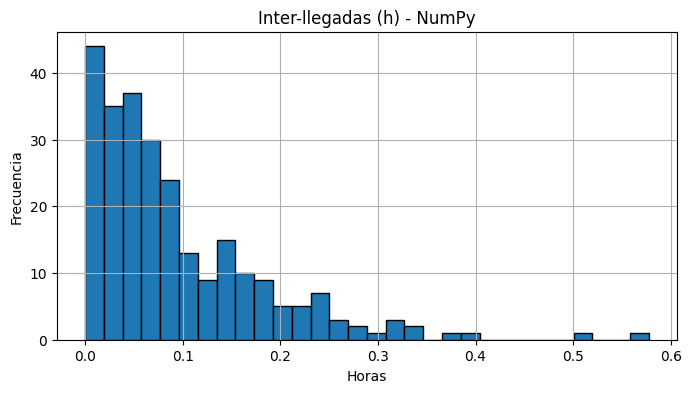

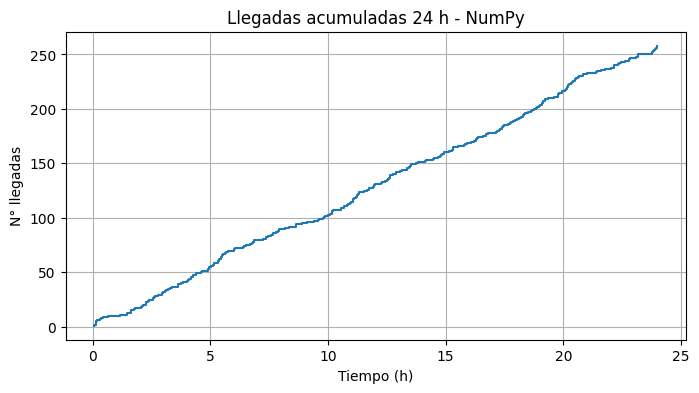

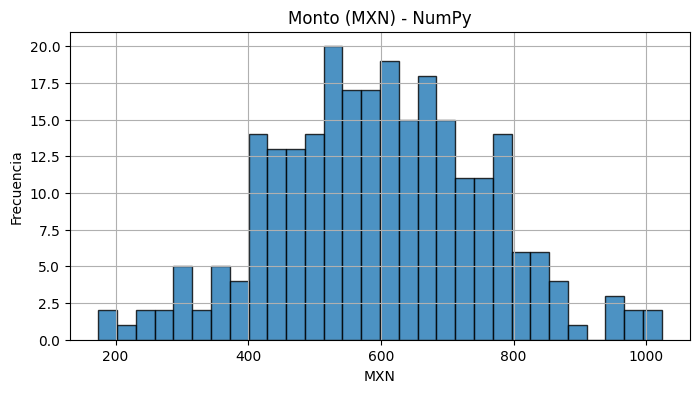

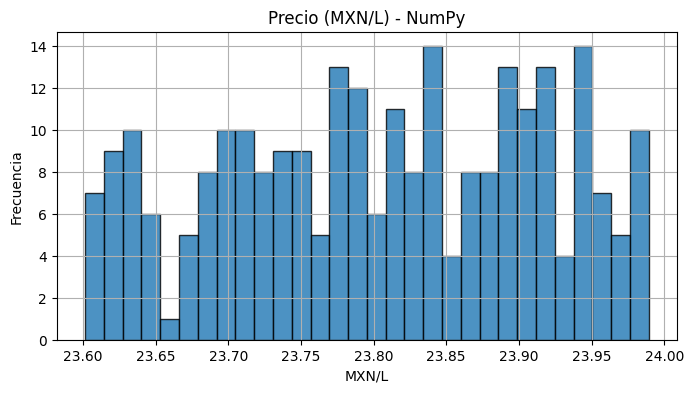

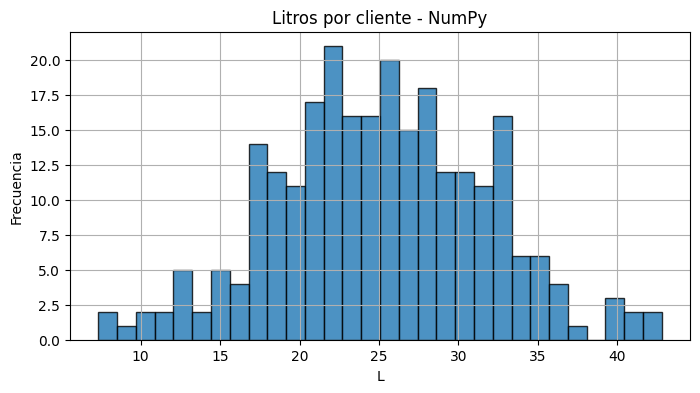

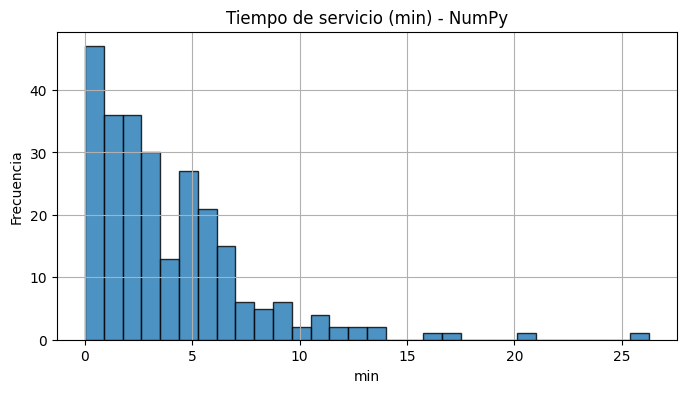

CSV guardado: sim_gasolinera_numpy.csv

--- LCG ---
Clientes en 24 h: 305

[Inter-llegadas (h) [LCG]] n=305
  media=0.0781  |  std=0.0763
  P25=0.0217  |  P50=0.0574  |  P75=0.1076

[Monto MXN [LCG]] n=305
  media=583.9543  |  std=137.5458
  P25=495.2024  |  P50=589.1934  |  P75=670.2607

[Precio MXN/L [LCG]] n=305
  media=23.7956  |  std=0.1108
  P25=23.7042  |  P50=23.7892  |  P75=23.8910

[Litros [LCG]] n=305
  media=24.5422  |  std=5.7837
  P25=20.8726  |  P50=24.7757  |  P75=28.1307

[Servicio (min) [LCG]] n=305
  media=4.2358  |  std=4.4817
  P25=1.3154  |  P50=2.7654  |  P75=5.6054


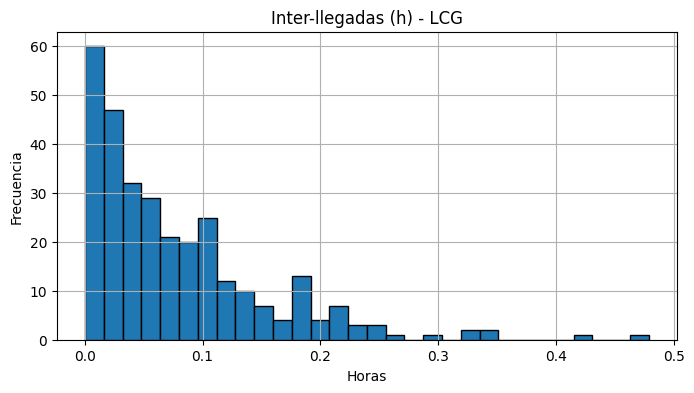

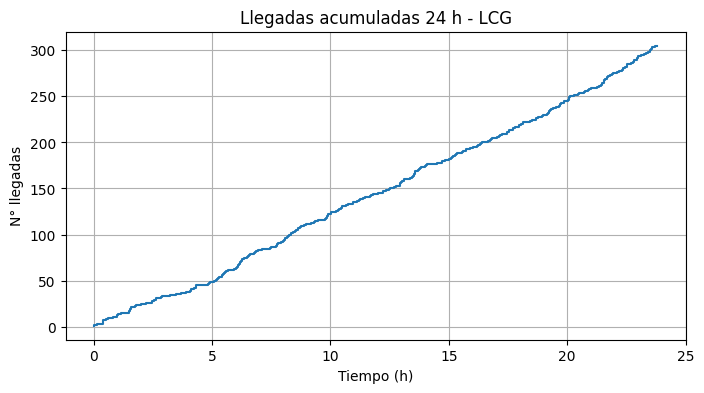

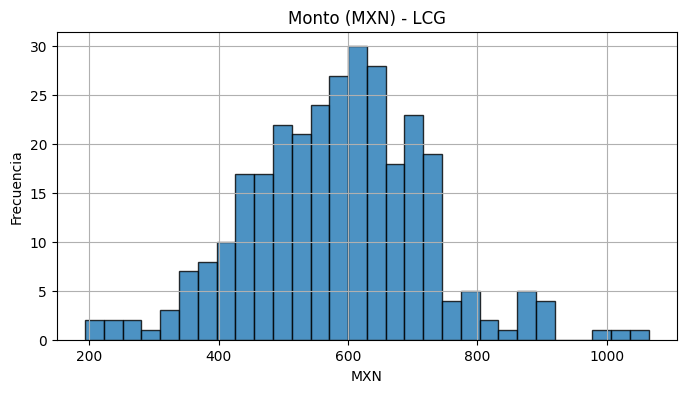

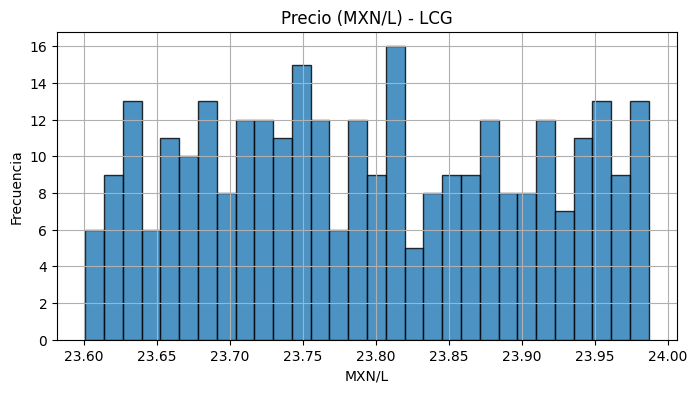

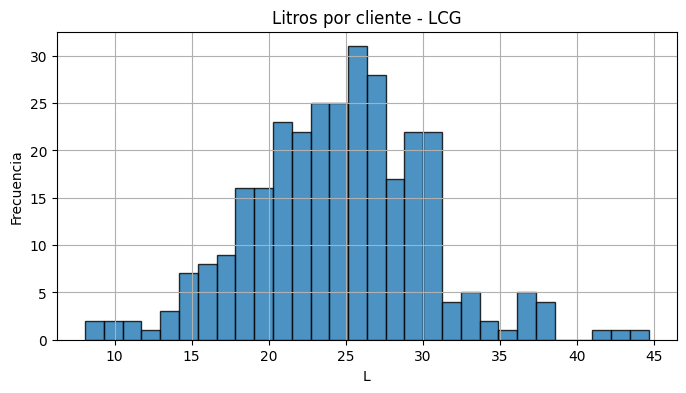

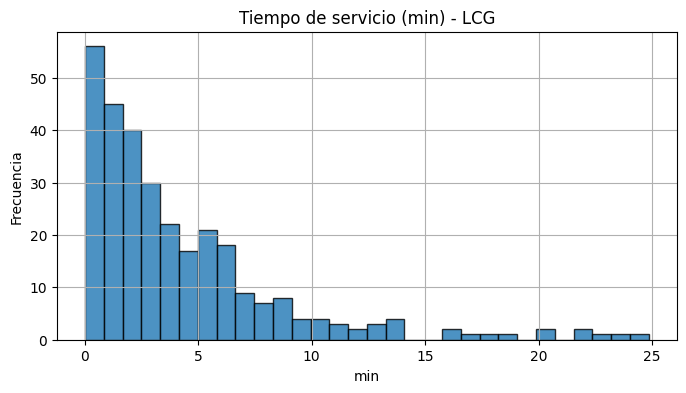

CSV guardado: sim_gasolinera_lcg.csv

Comparación: NumPy n=258, LCG n=305


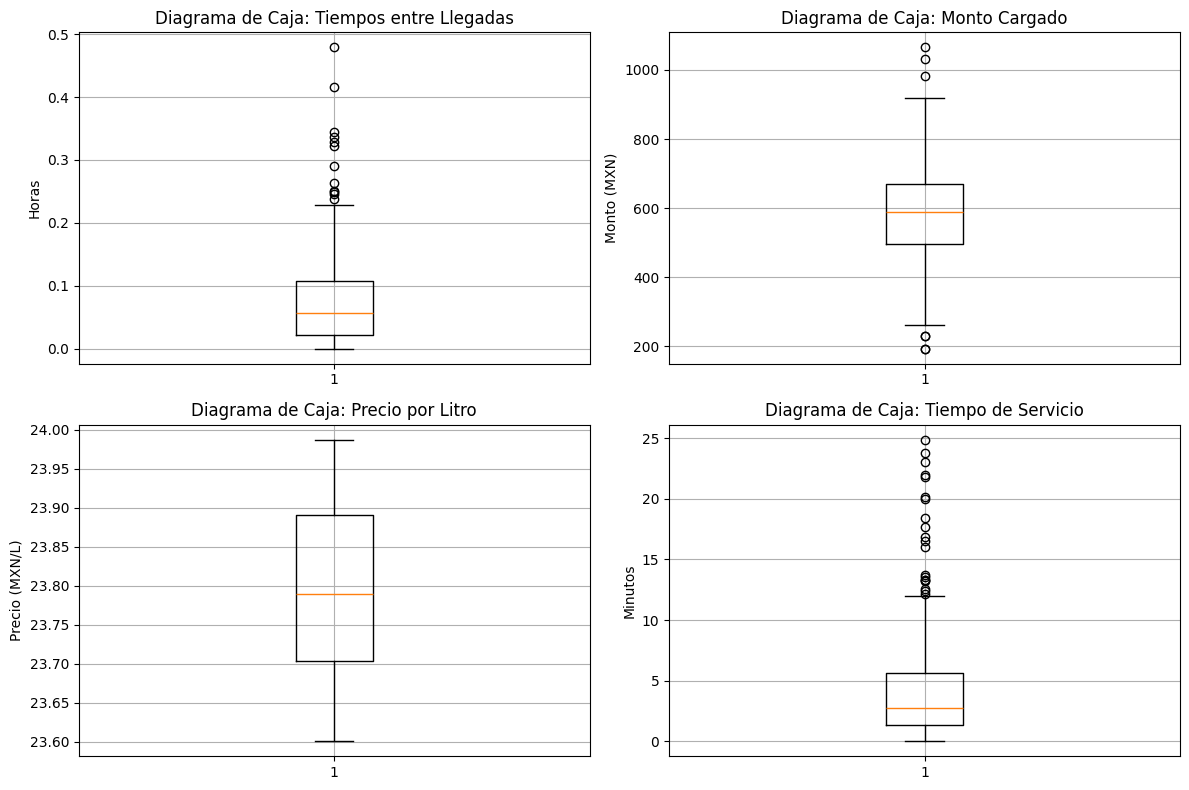

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
# Configuración general
# ============================================================
LAMBDA_LLEGADAS_H = 12         # tasa media de llegadas [1/h]
TOTAL_TIME_H      = 24         # tiempo total a simular [h]
SEED_NUMPY        = 0          # semilla para NumPy
SEED_LCG          = 12345      # semilla para LCG

# Variables económicas / de servicio
MONTO_MEDIA = 600.0            # MXN
MONTO_SD    = 150.0            # MXN
PRECIO_MIN  = 23.60            # MXN/L
PRECIO_MAX  = 23.99            # MXN/L
SERVICIO_MEDIA_S = 240.0       # segundos (4 min)

# Mostrar gráficos y/o guardar CSV
PLOT = True
SAVE_CSV = True

# ============================================================
# 1) Llegadas con NumPy
# ============================================================
def llegadas_numpy(lmbda_h, total_time_h, seed=0, buffer=100000):
    """
    Genera inter-llegadas exponenciales con NumPy y devuelve:
    - t: tiempos absolutos de llegada (horas), truncados a total_time_h
    - inter_usadas: inter-llegadas correspondientes a esas llegadas
    - rng: el generador de NumPy para seguir usando misma semilla
    """
    rng = np.random.default_rng(seed)
    inter = rng.exponential(1.0 / lmbda_h, size=buffer)  # horas
    t = np.cumsum(inter)
    t = t[t <= total_time_h]              # truncar al horizonte
    return t, inter[:len(t)], rng

# ============================================================
# 2) Llegadas con LCG (Park-Miller "minimal standard")
# ============================================================
a = 16807
c = 0
m = 2147483647  # 2^31 - 1

def lcg_uniforms(n, seed):
    """Devuelve n uniformes (0,1) y la nueva semilla del LCG."""
    x = seed % m
    out = np.empty(n, dtype=np.float64)
    for i in range(n):
        x = (a * x + c) % m
        u = x / m
        if u == 0.0:              # evitar log(0) al transformar
            u = (m - 1) / m
        out[i] = u
    return out, x

def llegadas_lcg(lmbda_h, total_time_h, seed=12345, chunk=10000):
    """
    Genera inter-llegadas ~ Exp(lmbda_h) con LCG por transformación inversa.
    Devuelve:
    - t_arr: tiempos absolutos de llegada (horas) truncados a total_time_h
    - inter_arr: inter-llegadas utilizadas
    - seed_out: nueva semilla del LCG
    """
    inter = []
    t_sum = 0.0
    current_seed = seed
    while t_sum <= total_time_h:
        U, current_seed = lcg_uniforms(chunk, current_seed)
        T = -np.log(1.0 - U) / lmbda_h  # horas
        for dt in T:
            if t_sum + dt > total_time_h:
                t_arr = np.cumsum(inter)
                return t_arr, np.array(inter, dtype=float), current_seed
            inter.append(dt)
            t_sum += dt  # *** CORRECCIÓN CLAVE: actualizar acumulado ***

# ============================================================
# 3) Construir dataset para N clientes
#    - monto ~ Normal(μ, σ)
#    - precio ~ Uniforme[a, b]
#    - litros = monto / precio
#    - servicio ~ Exponencial(media 240 s)  -> se reporta en minutos
# ============================================================
def construir_dataset(t_llegada_h, rng_numpy, clip_montos_negativos=False):
    n = t_llegada_h.shape[0]

    # Monto (puedes activar clip si no quieres valores ≤ 0)
    monto = rng_numpy.normal(MONTO_MEDIA, MONTO_SD, size=n)
    if clip_montos_negativos:
        monto = np.clip(monto, 1e-6, None)

    # Precio por litro
    precio = rng_numpy.uniform(PRECIO_MIN, PRECIO_MAX, size=n)

    # Litros
    litros = monto / precio

    # Servicio (segundos) -> minutos
    servicio_s   = rng_numpy.exponential(SERVICIO_MEDIA_S, size=n)
    servicio_min = servicio_s / 60.0

    # Inter-llegadas consistentes con t_llegada_h
    inter_h = np.empty_like(t_llegada_h)
    inter_h[0] = t_llegada_h[0]
    if n > 1:
        inter_h[1:] = np.diff(t_llegada_h)

    df = pd.DataFrame({
        "t_llegada_h": t_llegada_h,
        "inter_llegada_h": inter_h,
        "monto_mxn": monto,
        "precio_mxn_l": precio,
        "litros": litros,
        "servicio_min": servicio_min
    })
    return df

# ============================================================
# 4) Resumen estadístico rápido
# ============================================================
def resumen(x, nombre):
    x = np.asarray(x)
    if x.size == 0:
        print(f"[{nombre}] (sin datos)")
        return
    p25, p50, p75 = np.percentile(x, [25, 50, 75])
    print(f"\n[{nombre}] n={x.size}")
    print(f"  media={x.mean():.4f}  |  std={x.std(ddof=1):.4f}")
    print(f"  P25={p25:.4f}  |  P50={p50:.4f}  |  P75={p75:.4f}")

# ============================================================
# 5) Graficado básico (cerrando figuras para no gastar RAM)
# ============================================================
def graficas_basicas(df, titulo_prefix="NumPy"):
    # Histograma inter-llegadas
    plt.figure(figsize=(8,4))
    plt.hist(df["inter_llegada_h"], bins=30, edgecolor='black')
    plt.title(f"Inter-llegadas (h) - {titulo_prefix}")
    plt.xlabel("Horas"); plt.ylabel("Frecuencia"); plt.grid(True)
    plt.show(); plt.close()

    # Llegadas acumuladas
    plt.figure(figsize=(8,4))
    plt.step(df["t_llegada_h"], np.arange(1, len(df)+1))
    plt.title(f"Llegadas acumuladas 24 h - {titulo_prefix}")
    plt.xlabel("Tiempo (h)"); plt.ylabel("N° llegadas"); plt.grid(True)
    plt.show(); plt.close()

    # Monto
    plt.figure(figsize=(8,4))
    plt.hist(df["monto_mxn"], bins=30, edgecolor='black', alpha=0.8)
    plt.title(f"Monto (MXN) - {titulo_prefix}")
    plt.xlabel("MXN"); plt.ylabel("Frecuencia"); plt.grid(True)
    plt.show(); plt.close()

    # Precio
    plt.figure(figsize=(8,4))
    plt.hist(df["precio_mxn_l"], bins=30, edgecolor='black', alpha=0.8)
    plt.title(f"Precio (MXN/L) - {titulo_prefix}")
    plt.xlabel("MXN/L"); plt.ylabel("Frecuencia"); plt.grid(True)
    plt.show(); plt.close()

    # Litros
    plt.figure(figsize=(8,4))
    plt.hist(df["litros"], bins=30, edgecolor='black', alpha=0.8)
    plt.title(f"Litros por cliente - {titulo_prefix}")
    plt.xlabel("L"); plt.ylabel("Frecuencia"); plt.grid(True)
    plt.show(); plt.close()

    # Servicio
    plt.figure(figsize=(8,4))
    plt.hist(df["servicio_min"], bins=30, edgecolor='black', alpha=0.8)
    plt.title(f"Tiempo de servicio (min) - {titulo_prefix}")
    plt.xlabel("min"); plt.ylabel("Frecuencia"); plt.grid(True)
    plt.show(); plt.close()

# ============================================================
# 6) Pipelines: correr, resumir, graficar y exportar
# ============================================================
def correr_metodo_numpy():
    t_llegada_h, inter_usadas_h, rng = llegadas_numpy(
        LAMBDA_LLEGADAS_H, TOTAL_TIME_H, seed=SEED_NUMPY
    )
    print(f"\n--- NUMPY ---")
    print(f"Clientes en {TOTAL_TIME_H} h: {t_llegada_h.size}")

    df = construir_dataset(t_llegada_h, rng)

    # Resúmenes
    resumen(df["inter_llegada_h"], "Inter-llegadas (h) [NumPy]")
    resumen(df["monto_mxn"],       "Monto MXN [NumPy]")
    resumen(df["precio_mxn_l"],    "Precio MXN/L [NumPy]")
    resumen(df["litros"],          "Litros [NumPy]")
    resumen(df["servicio_min"],    "Servicio (min) [NumPy]")

    # Gráficas
    if PLOT:
        graficas_basicas(df, "NumPy")

    # Exportar
    if SAVE_CSV:
        df.to_csv("sim_gasolinera_numpy.csv", index=False)
        print("CSV guardado: sim_gasolinera_numpy.csv")
    return df

def correr_metodo_lcg():
    t_llegada_h, inter_h, seed_out = llegadas_lcg(
        LAMBDA_LLEGADAS_H, TOTAL_TIME_H, seed=SEED_LCG
    )
    print(f"\n--- LCG ---")
    print(f"Clientes en {TOTAL_TIME_H} h: {t_llegada_h.size}")

    # RNG NumPy (solo para variables económicas/servicio)
    rng = np.random.default_rng(SEED_NUMPY + 1)
    df = construir_dataset(t_llegada_h, rng)

    # Resúmenes
    resumen(df["inter_llegada_h"], "Inter-llegadas (h) [LCG]")
    resumen(df["monto_mxn"],       "Monto MXN [LCG]")
    resumen(df["precio_mxn_l"],    "Precio MXN/L [LCG]")
    resumen(df["litros"],          "Litros [LCG]")
    resumen(df["servicio_min"],    "Servicio (min) [LCG]")

    # Gráficas
    if PLOT:
        graficas_basicas(df, "LCG")

    # Exportar
    if SAVE_CSV:
        df.to_csv("sim_gasolinera_lcg.csv", index=False)
        print("CSV guardado: sim_gasolinera_lcg.csv")
    return df

# ============================================================
# 7) Diagrama de caja para LCG
# ============================================================
def diagrama_caja_lcg(df_lcg):
    tiempos_entre_llegadas = df_lcg["inter_llegada_h"]
    monto                  = df_lcg["monto_mxn"]
    precio                 = df_lcg["precio_mxn_l"]
    tiempos_servicio       = df_lcg["servicio_min"]

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.boxplot(tiempos_entre_llegadas, vert=True)
    plt.title("Diagrama de Caja: Tiempos entre Llegadas")
    plt.ylabel("Horas")
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.boxplot(monto, vert=True)
    plt.title("Diagrama de Caja: Monto Cargado")
    plt.ylabel("Monto (MXN)")
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.boxplot(precio, vert=True)
    plt.title("Diagrama de Caja: Precio por Litro")
    plt.ylabel("Precio (MXN/L)")
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.boxplot(tiempos_servicio, vert=True)
    plt.title("Diagrama de Caja: Tiempo de Servicio")
    plt.ylabel("Minutos")
    plt.grid(True)

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    df_numpy = correr_metodo_numpy()
    df_lcg   = correr_metodo_lcg()
    print(f"\nComparación: NumPy n={len(df_numpy)}, LCG n={len(df_lcg)}")

    # Diagrama de caja para LCG
    diagrama_caja_lcg(df_lcg)
